### Project-6: Predicting House Prices By Sahran Altaf
#### Objective: Build a predictive model to estimate house prices based on various features using regression techniques.

**Dataset Description**

The housing dataset comprises **545 records** with **13 attributes**, each contributing to understanding housing price determinants. This structured dataset includes one **target variable** (the price of the house) and various **predictor variables** that capture the house’s physical and locational characteristics. The dataset's key components are detailed as follows:

1. **Target Variable**:
   - **Price**: Represents the house price in currency units. This is a continuous numerical variable and the primary focus for prediction.

2. **Predictor Variables**:
   - **Numerical Features**:
     - **Area**: The total area of the house measured in square feet.
     - **Bedrooms**: Count of bedrooms in the house.
     - **Bathrooms**: Count of bathrooms.
     - **Stories**: Number of floors or stories in the building.
     - **Parking**: Number of available parking spaces.
   
   - **Binary Categorical Features**:
     - **Mainroad**: Indicates if the house is close to the main road, with values "yes" or "no."
     - **Guestroom**: Specifies the presence of a guest room, with values "yes" or "no."
     - **Basement**: Indicates if there is a basement, with values "yes" or "no."
     - **Hotwaterheating**: Shows the availability of hot water heating, with values "yes" or "no."
     - **Airconditioning**: Indicates whether the house has air conditioning, with values "yes" or "no."
     - **Prefarea**: Refers to whether the house is in a preferred area, with values "yes" or "no."

   - **Multi-level Categorical Feature**:
     - **Furnishingstatus**: Specifies the level of furnishing in the house, categorized as "furnished," "semi-furnished," or "unfurnished."

3. **Dataset Characteristics**:
   - The dataset does not contain any missing values, making it readily usable for analysis and modeling.
   - Given the diverse attributes and possible dependencies among them, the dataset exhibits potential **multicollinearity**, a factor to consider carefully when building predictive models. Such interdependencies may challenge model performance, requiring appropriate handling techniques.

This dataset provides a comprehensive foundation to model housing prices while addressing complexities such as multicollinearity, aiming to predict housing prices based on the described features.

### 1. Data Acquisition:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error,mean_squared_log_error, median_absolute_error, explained_variance_score, r2_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder


In [2]:
# Load the dataset
data = pd.read_csv('Housing.csv')

# Preview the first few rows of the data
df=data
data.head()



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### 2. Data Preprocessing:

In [4]:
print(data.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [5]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [6]:
# Check data types of each column
print("\nData types of each column:\n", data.dtypes)


Data types of each column:
 price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [7]:
print("\nSummary statistics:\n", data.describe())


Summary statistics:
               price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


#### Encoding 

In [8]:
##LABEL ENCODER
data_encoded = data.copy()

binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
label_encoder = LabelEncoder()
for column in binary_columns:
    data_encoded[column] = label_encoder.fit_transform(data_encoded[column])

data_encoded.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [9]:
## OneHotEncoder
data_encoded = data_encoded.copy()

columns_to_encode = ['furnishingstatus']
one_hot_encoder = OneHotEncoder()
encoded_data = one_hot_encoder.fit_transform(data_encoded[columns_to_encode]).toarray()

encoded_columns = one_hot_encoder.get_feature_names_out(columns_to_encode)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

data_encoded = data_encoded.drop(columns_to_encode, axis=1)
data_encoded = pd.concat([data_encoded, encoded_df], axis=1)

print(data_encoded.head())
data=data_encoded

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_furnished  furnishingstatus_semi-furnished  \
0                         1.0                              0.0   
1                         

### 3. Exploratory Data Analysis (EDA):

C:\Users\darsa\AppData\Local\Temp\ipykernel_4696\1345557332.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price)


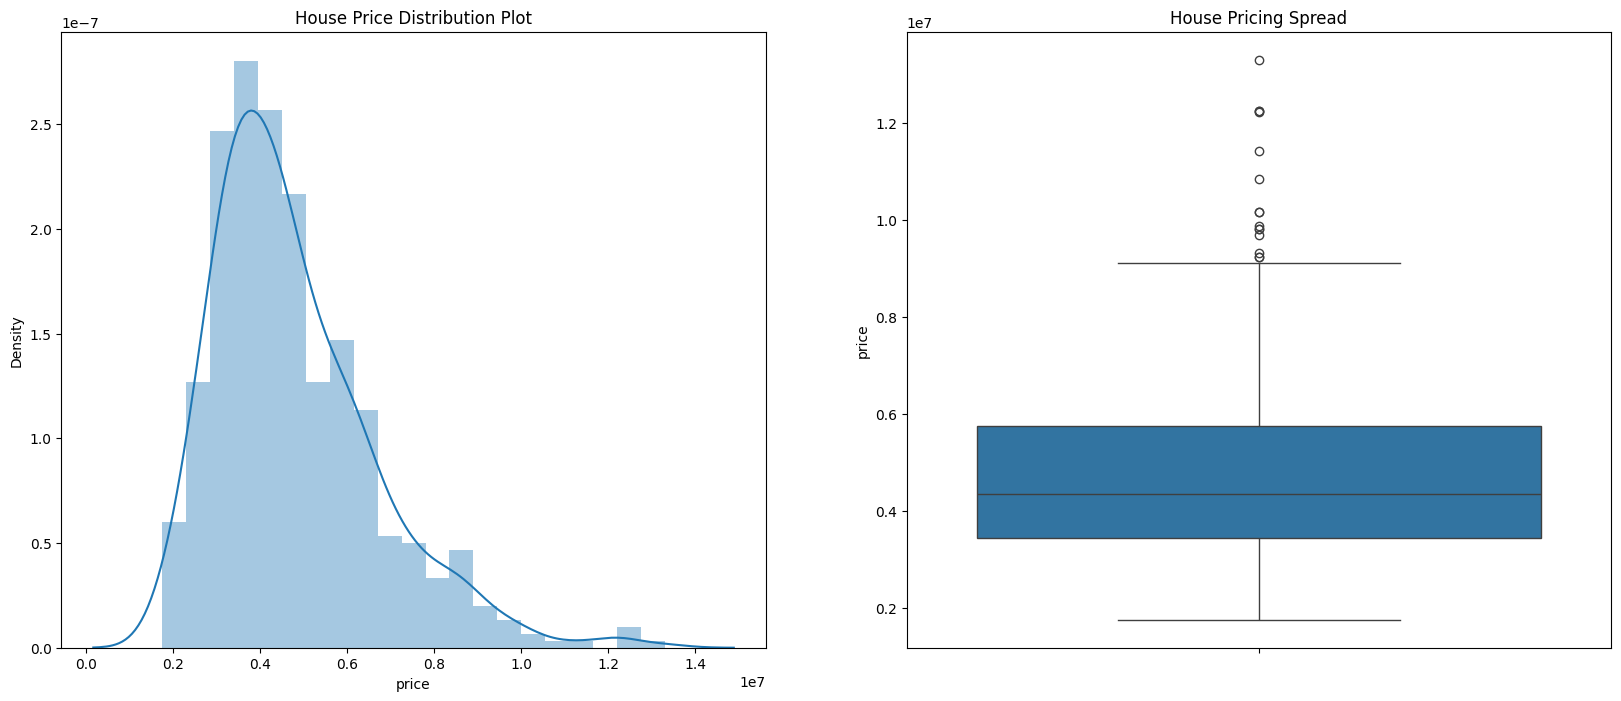

In [10]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('House Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
sns.boxplot(df.price)
plt.title('House Pricing Spread')

plt.show()

**Visualising Categorical Data**

In [11]:
categorical_list = [x for x in df.columns if df[x].dtype =='object']

In [12]:
for x in categorical_list: print(x)

mainroad
guestroom
basement
hotwaterheating
airconditioning
prefarea
furnishingstatus


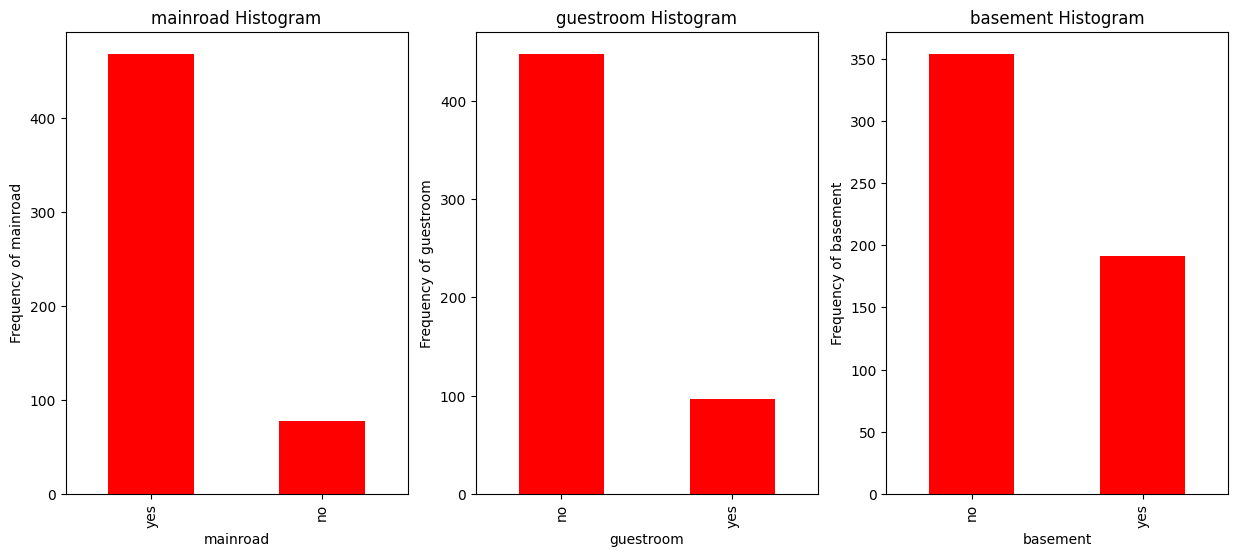

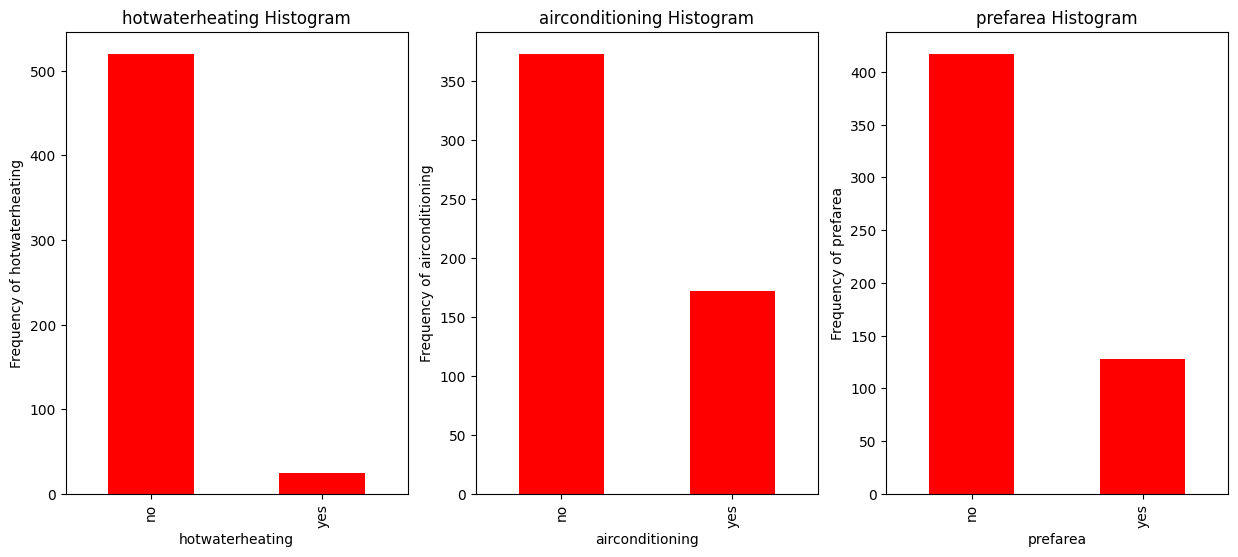

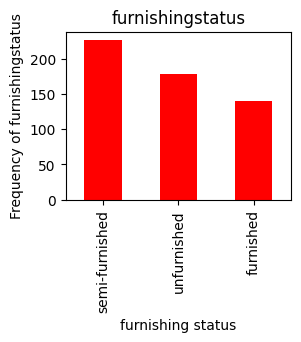

In [13]:
plt.figure(figsize=(15, 6))

plt.subplot(1,3,1)
plt1 = df['mainroad'].value_counts().plot(kind='bar',color='r')
plt.title('mainroad Histogram')
plt1.set(xlabel = 'mainroad', ylabel='Frequency of mainroad')

plt.subplot(1,3,2)
plt1 = df['guestroom'].value_counts().plot(kind='bar',color='r')
plt.title('guestroom Histogram')
plt1.set(xlabel = 'guestroom', ylabel='Frequency of guestroom')

plt.subplot(1,3,3)
plt1 = df['basement'].value_counts().plot(kind='bar',color='r')
plt.title('basement Histogram')
plt1.set(xlabel = 'basement', ylabel='Frequency of basement')


plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt1 = df['hotwaterheating'].value_counts().plot(kind='bar',color='r')
plt.title('hotwaterheating Histogram')
plt1.set(xlabel = 'hotwaterheating', ylabel='Frequency of hotwaterheating')

plt.subplot(1, 3, 2)
plt1 = df['airconditioning'].value_counts().plot(kind='bar',color='r')
plt.title('airconditioning Histogram')
plt1.set(xlabel = 'airconditioning', ylabel='Frequency of airconditioning')

plt.subplot(1, 3, 3)
plt1 = df['prefarea'].value_counts().plot(kind='bar',color='r')
plt.title('prefarea Histogram')
plt1.set(xlabel = 'prefarea', ylabel='Frequency of prefarea')
plt.show()

plt.subplot(2, 2, 3)
plt1 = df['furnishingstatus'].value_counts().plot(kind='bar',color='r')
plt.title('furnishingstatus')
plt1.set(xlabel = 'furnishing status', ylabel='Frequency of furnishingstatus')
plt.show()



**Visualising numerical data**

In [14]:
numerical_list = [x for x in df.columns if df[x].dtype in ('int64','float64')]
print(numerical_list)

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


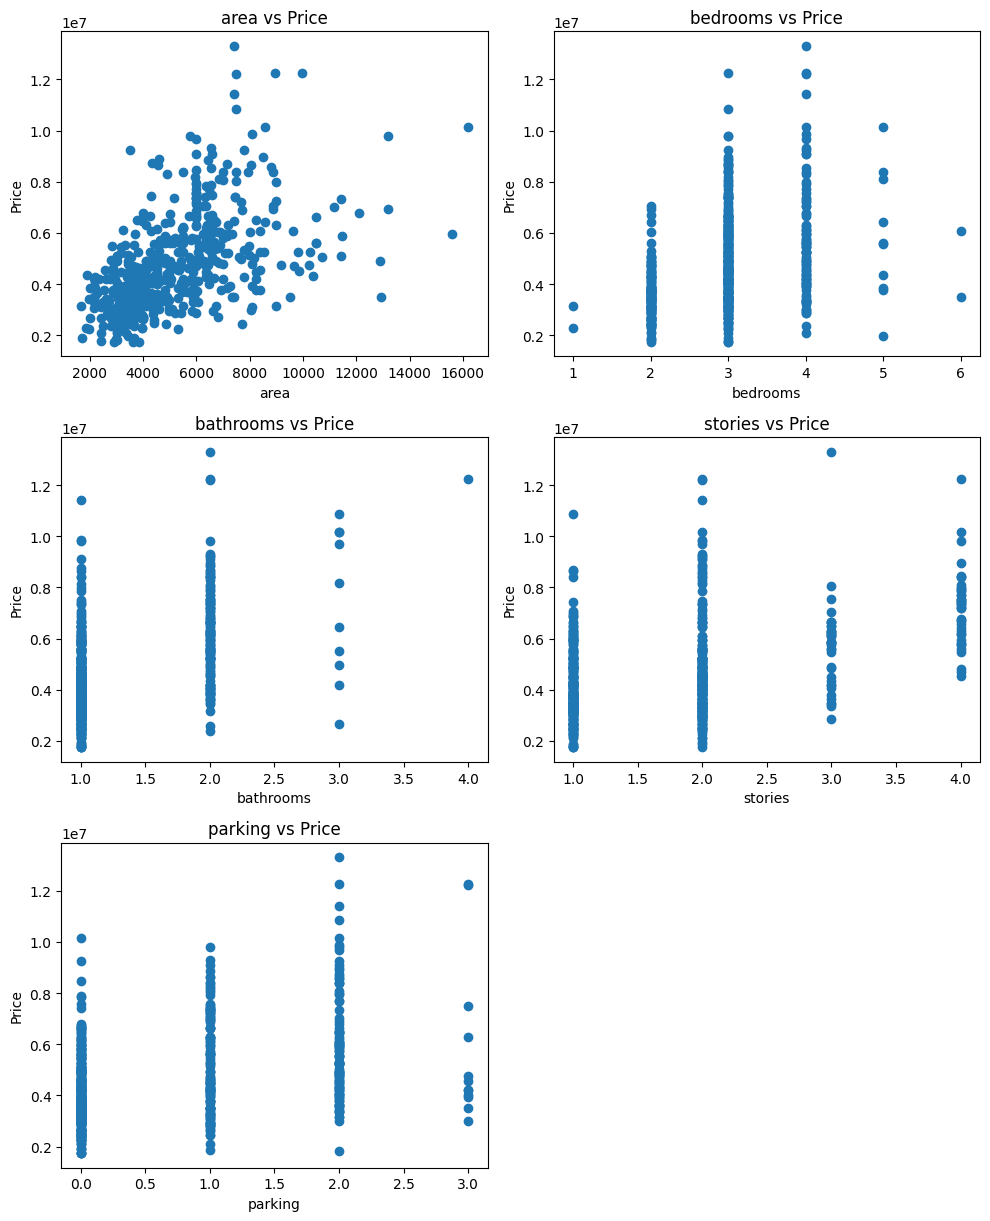

In [15]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('area', 1)
scatter('bedrooms', 2)
scatter('bathrooms', 3)
scatter('stories', 4)
scatter('parking',5)

plt.tight_layout()

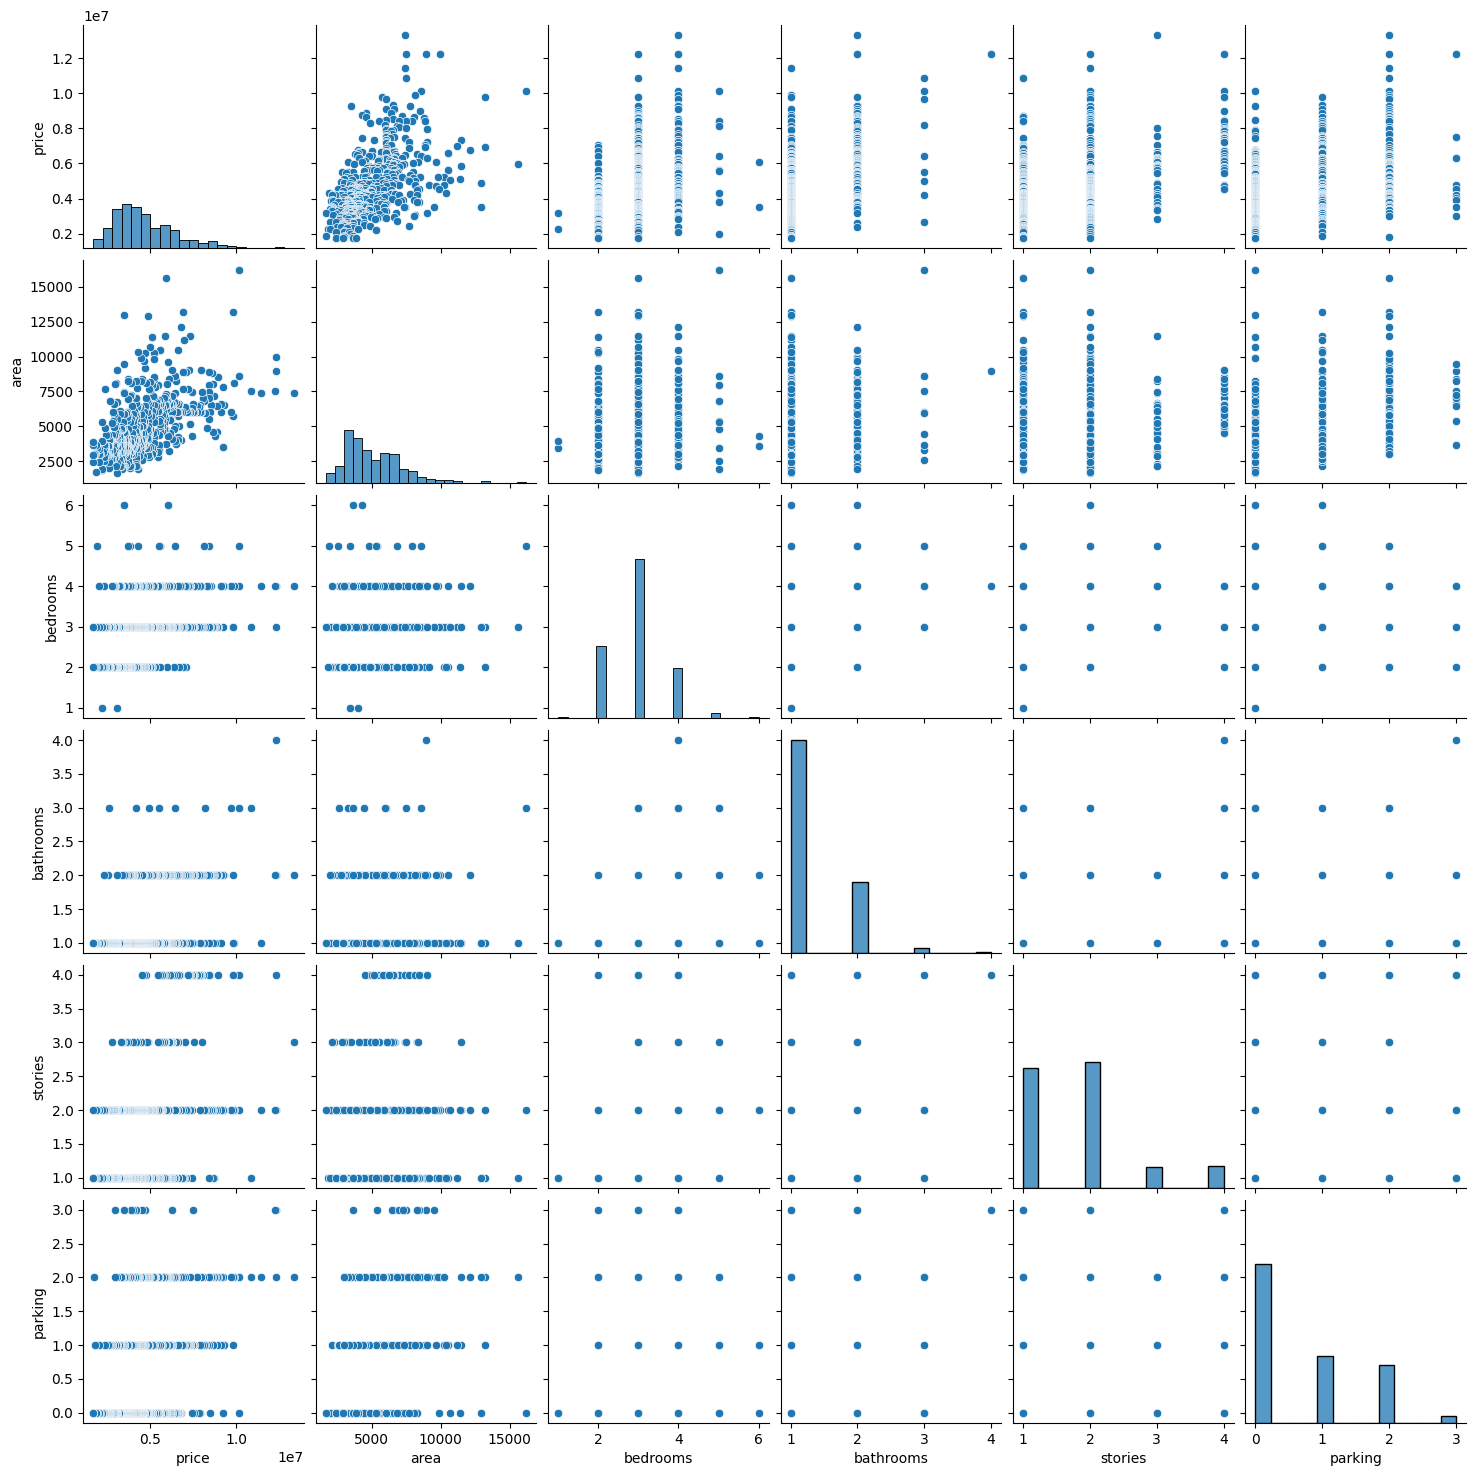

In [16]:
sns.pairplot(df)
plt.show()

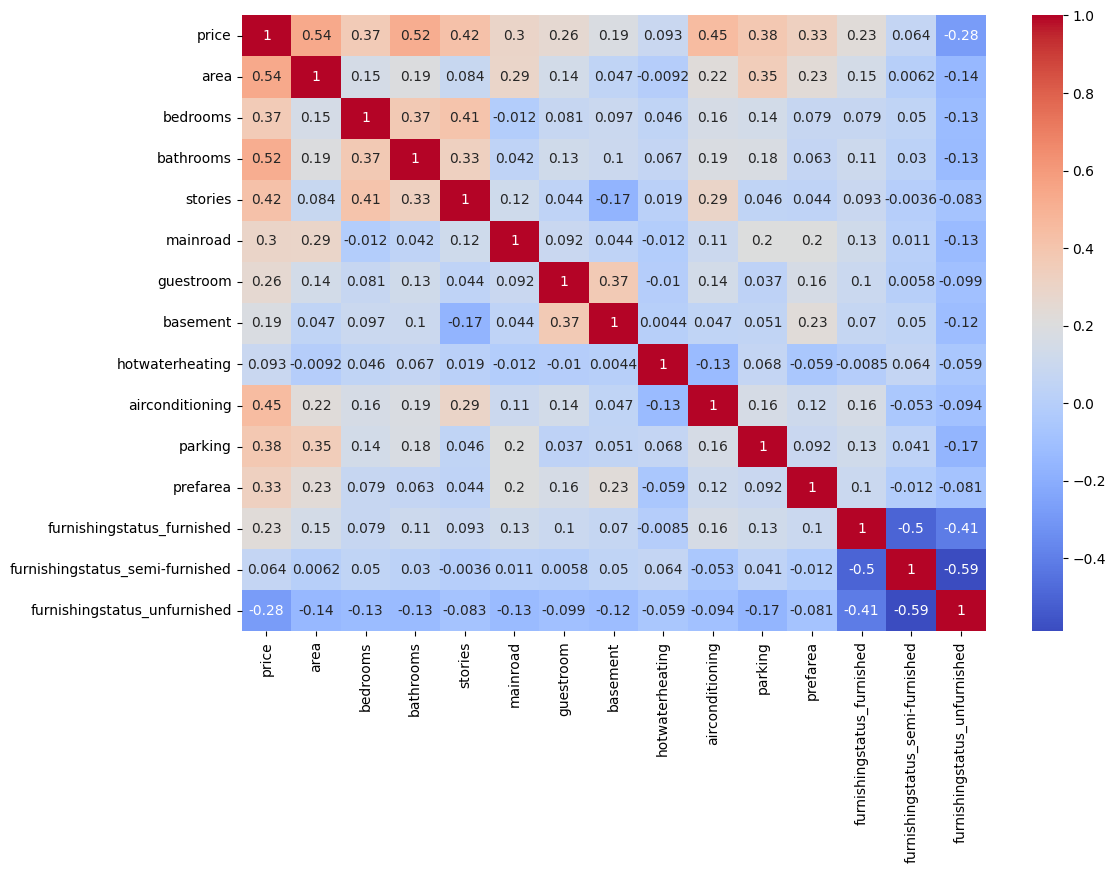

In [17]:
# Plotting correlations with the target variable (assumed to be 'price')
plt.figure(figsize=(12, 8))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.show()

### 4. Model Implementation:

In [18]:
X = data.drop('price', axis=1)  # Assuming 'price' is the target column
y = data['price']

In [19]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,1.0,0.0,0.0
1,8960,4,4,4,1,0,0,0,1,3,0,1.0,0.0,0.0
2,9960,3,2,2,1,0,1,0,0,2,1,0.0,1.0,0.0
3,7500,4,2,2,1,0,1,0,1,3,1,1.0,0.0,0.0
4,7420,4,1,2,1,1,1,0,1,2,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0.0,0.0,1.0
541,2400,3,1,1,0,0,0,0,0,0,0,0.0,1.0,0.0
542,3620,2,1,1,1,0,0,0,0,0,0,0.0,0.0,1.0
543,2910,3,1,1,0,0,0,0,0,0,0,1.0,0.0,0.0


In [20]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Support Vector Regression': SVR()
}

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Dictionary to store results
results = {}

# Loop through each model in the models dictionary
for model_name, model in models.items():
    
    # Perform 5-fold cross-validation on the training data
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    
    # Train the model on the full training data
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)                      # Mean Absolute Error on the test set
    mse = mean_squared_error(y_test, y_pred)                       # Mean Squared Error on the test set
    rmse = np.sqrt(mse)                                            # Root Mean Squared Error on the test set
    r2 = r2_score(y_test, y_pred)                                  # R² score on the test set
    
    # Store results in the dictionary
    results[model_name] = {
        'CV Mean Absolute Error': -cv_scores.mean(),               # Cross-validated MAE (neg_mean_absolute_error is negative)
        'Test MAE': mae,
        'Test MSE': mse,
        'Test RMSE': rmse,
        'Test R2': r2
    }



### 5. Evaluation:

In [24]:
results

{'Linear Regression': {'CV Mean Absolute Error': 763126.2319306389,
  'Test MAE': 920392.9397607957,
  'Test MSE': 1523019469501.2913,
  'Test RMSE': 1234106.7496376848,
  'Test R2': 0.6463350878895877},
 'Decision Tree': {'CV Mean Absolute Error': 1045894.4641148325,
  'Test MAE': 1264800.5487804879,
  'Test MSE': 3470028775751.829,
  'Test RMSE': 1862801.324820183,
  'Test R2': 0.19421422603433647},
 'Support Vector Regression': {'CV Mean Absolute Error': 1339540.4629902605,
  'Test MAE': 1578104.46217428,
  'Test MSE': 4462165511358.022,
  'Test RMSE': 2112383.8456488024,
  'Test R2': -0.036172816565041455}}

In [25]:
import pandas as pd
from tabulate import tabulate

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results).T

# Check the column names to ensure 'Test R2' exists
# print("Column names in results_df:", results_df.columns)

# If the correct column is named differently, replace 'Test R2' with the correct column name
# Sort the DataFrame by 'Test R2' in descending order if it exists
if 'Test R2' in results_df.columns:
    results_df = results_df.sort_values(by='Test R2', ascending=False)
else:
    print("'Test R2' column not found. Sorting by a different metric.")
    # You could also sort by another column here if needed, e.g., 'Test MAE'

# Display the DataFrame in a table format
print("\nModel Comparison:\n")
print(tabulate(results_df, headers='keys', tablefmt='pretty', floatfmt=".4f"))



Model Comparison:

+---------------------------+------------------------+--------------------+--------------------+--------------------+-----------------------+
|                           | CV Mean Absolute Error |      Test MAE      |      Test MSE      |     Test RMSE      |        Test R2        |
+---------------------------+------------------------+--------------------+--------------------+--------------------+-----------------------+
|     Linear Regression     |   763126.2319306389    | 920392.9397607957  | 1523019469501.2913 | 1234106.7496376848 |  0.6463350878895877   |
|       Decision Tree       |   1045894.4641148325   | 1264800.5487804879 | 3470028775751.829  | 1862801.324820183  |  0.19421422603433647  |
| Support Vector Regression |   1339540.4629902605   |  1578104.46217428  | 4462165511358.022  | 2112383.8456488024 | -0.036172816565041455 |
+---------------------------+------------------------+--------------------+--------------------+--------------------+-----------

### 6. Conclusion:


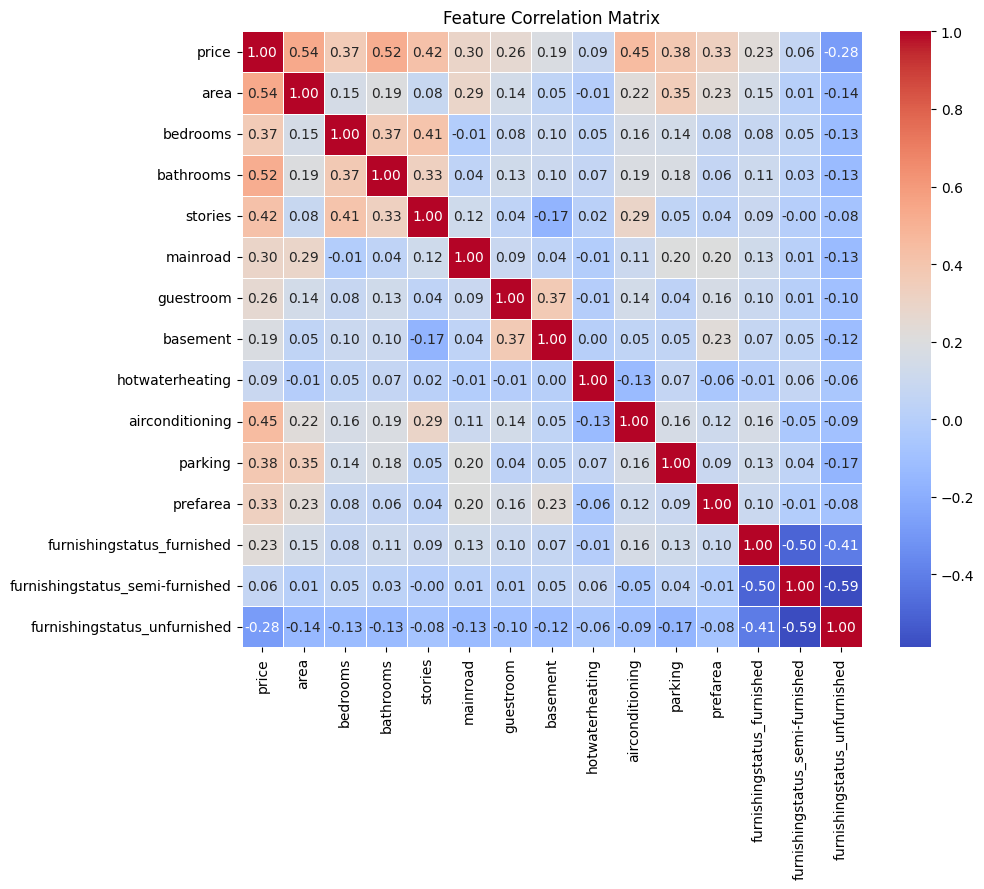

price        1.000000
area         0.535997
bathrooms    0.517545
Name: price, dtype: float64

In [26]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot a heatmap of the correlation matrix to visualize feature correlations with 'price'
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

# Identify the features most correlated with 'price' (absolute value > 0.5 as a threshold for importance)
important_features = correlation_matrix['price'][correlation_matrix['price'].abs() > 0.5].sort_values(ascending=False)
important_features


#### The correlation analysis indicates that the most important features for predicting house prices are:

* Area (correlation = 0.536): A larger house area is moderately correlated with a higher price.
* Bathrooms (correlation = 0.518): More bathrooms also moderately correlate with a higher price.

These features show the strongest positive correlations with price, making them potentially significant predictors in a regression model. Other features with lower correlations may have minimal impact on predicting house prices.*

### 7. Model Comparison:

* Linear Regression

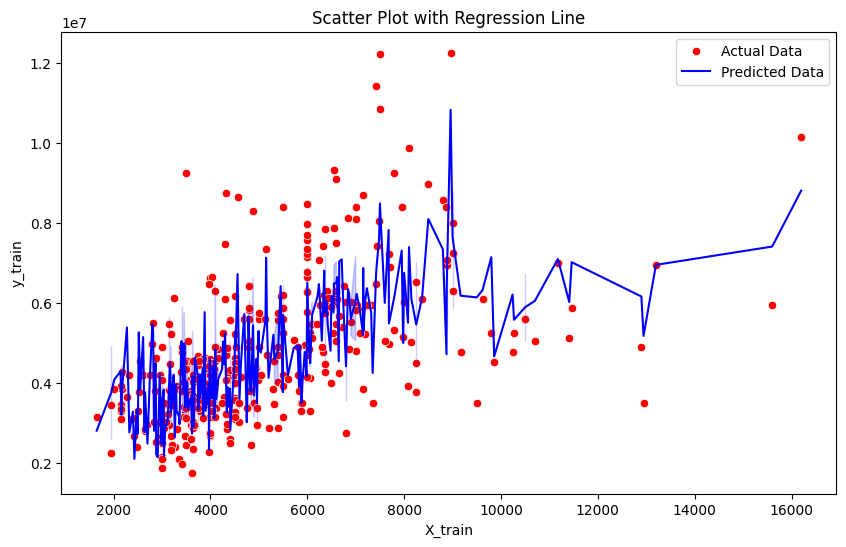

In [27]:
# Ensure X_train is in the correct shape for plotting
X_train_plot = X_train.values if hasattr(X_train, 'values') else X_train

# Check if X_train needs reshaping
if X_train_plot.ndim > 1:
    X_train_plot = X_train_plot[:, 0]  # Selecting the first column

# Create a DataFrame for plotting
regressor = LinearRegression()
regressor.fit(X_train, y_train)
plot_data = pd.DataFrame({'X_train': X_train_plot, 'y_train': y_train})
plot_data['predicted'] = regressor.predict(X_train)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_data, x='X_train', y='y_train', color='red', label='Actual Data')
sns.lineplot(data=plot_data, x='X_train', y='predicted', color='blue', label='Predicted Data')
plt.title('Scatter Plot with Regression Line')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.legend()
plt.show()


* Decision Tree

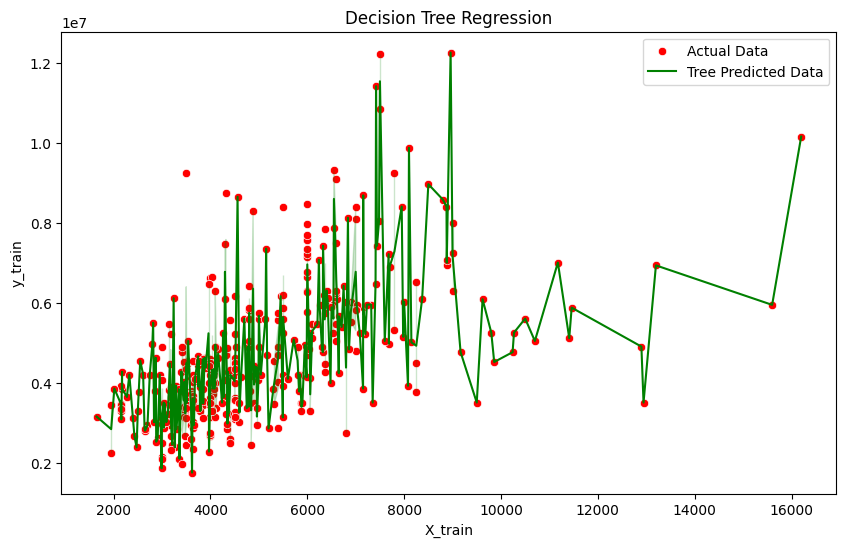

In [28]:
# Initialize and train the Decision Tree Regressor
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(X_train, y_train)

# Predict using the trained model
plot_data['tree_predicted'] = tree_regressor.predict(X_train)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_data, x='X_train', y='y_train', color='red', label='Actual Data')
sns.lineplot(data=plot_data, x='X_train', y='tree_predicted', color='green', label='Tree Predicted Data')
plt.title('Decision Tree Regression')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.legend()
plt.show()


* Support Vector Regression

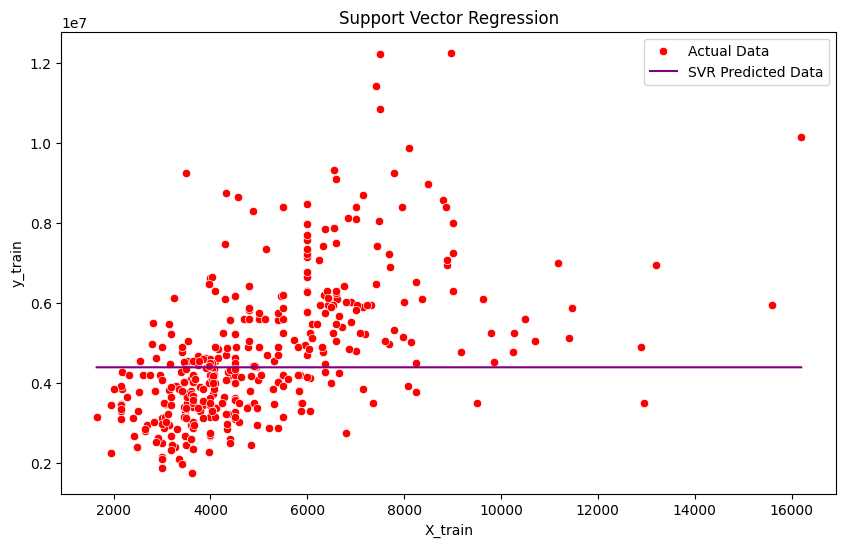

In [29]:
# Initialize and train the SVR
svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_train, y_train)

# Predict using the trained model
plot_data['svr_predicted'] = svr_regressor.predict(X_train)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_data, x='X_train', y='y_train', color='red', label='Actual Data')
sns.lineplot(data=plot_data, x='X_train', y='svr_predicted', color='purple', label='SVR Predicted Data')
plt.title('Support Vector Regression')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.legend()
plt.show()


In [30]:
# Re-run model training and evaluation to define `best_model`
# Initialize models dictionary again (if not already defined)
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Support Vector Regression': SVR()
}

# Train models and calculate R² score
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = r2_score(y_test, y_pred)

# Select the best model based on R² score
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")


Best Model: Linear Regression


### User and Model Interaction To get the price of House

### GUI Based Prediction 

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import tkinter as tk
from tkinter import messagebox, StringVar, OptionMenu

# Function to make predictions
def predict_price():
    try:
        # Collect input from the drop-down menus
        area = float(area_entry.get())
        bedrooms = int(bedrooms_var.get())
        bathrooms = int(bathrooms_var.get())
        stories = int(stories_var.get())
        mainroad = int(mainroad_var.get())
        guestroom = int(guestroom_var.get())
        basement = int(basement_var.get())
        hotwaterheating = int(hotwaterheating_var.get())
        airconditioning = int(airconditioning_var.get())
        parking = int(parking_var.get())
        prefarea = int(prefarea_var.get())

        # Collect furnishing status
        furnishingstatus_furnished = 1 if furnishingstatus_var.get() == "Furnished" else 0
        furnishingstatus_semi_furnished = 1 if furnishingstatus_var.get() == "Semi-Furnished" else 0
        furnishingstatus_unfurnished = 1 if furnishingstatus_var.get() == "Unfurnished" else 0

        # Prepare input data for prediction
        input_data = pd.DataFrame([[area, bedrooms, bathrooms, stories, mainroad,
                                     guestroom, basement, hotwaterheating, airconditioning,
                                     parking, prefarea, 
                                     furnishingstatus_furnished, 
                                     furnishingstatus_semi_furnished, 
                                     furnishingstatus_unfurnished]], 
                                   columns=['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
                                            'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
                                            'parking', 'prefarea', 
                                            'furnishingstatus_furnished', 
                                            'furnishingstatus_semi-furnished', 
                                            'furnishingstatus_unfurnished'])

        # Make the prediction
        price_prediction = regressor.predict(input_data)

        # Display the result in a message box
        messagebox.showinfo("Price Prediction", f"The Price Should Be: ${price_prediction[0]:,.2f}")
    
    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numerical values.")

# Create the main window
root = tk.Tk()
root.title("Housing Agency")
root.geometry("600x600")

# Configure grid layout
for i in range(12):
    root.grid_rowconfigure(i, weight=1)
root.grid_columnconfigure(0, weight=1)
root.grid_columnconfigure(1, weight=1)

# Area input
tk.Label(root, text="Area (in sq ft):", font=("Arial", 12)).grid(row=0, column=0, sticky="ew", padx=10, pady=5)
area_entry = tk.Entry(root, font=("Arial", 12))
area_entry.grid(row=0, column=1, sticky="ew", padx=10, pady=5)

# Drop-down for bedrooms
tk.Label(root, text="Number of Bedrooms:", font=("Arial", 12)).grid(row=1, column=0, sticky="ew", padx=10, pady=5)
bedrooms_var = StringVar(root)
bedrooms_var.set("1")  # Default value
bedrooms_menu = OptionMenu(root, bedrooms_var, *[str(i) for i in range(1, 7)])
bedrooms_menu.config(font=("Arial", 12))
bedrooms_menu.grid(row=1, column=1, sticky="ew", padx=10, pady=5)

# Drop-down for bathrooms
tk.Label(root, text="Number of Bathrooms:", font=("Arial", 12)).grid(row=2, column=0, sticky="ew", padx=10, pady=5)
bathrooms_var = StringVar(root)
bathrooms_var.set("1")  # Default value
bathrooms_menu = OptionMenu(root, bathrooms_var, *[str(i) for i in range(1, 5)])
bathrooms_menu.config(font=("Arial", 12))
bathrooms_menu.grid(row=2, column=1, sticky="ew", padx=10, pady=5)

# Drop-down for stories
tk.Label(root, text="Number of Stories:", font=("Arial", 12)).grid(row=3, column=0, sticky="ew", padx=10, pady=5)
stories_var = StringVar(root)
stories_var.set("1")  # Default value
stories_menu = OptionMenu(root, stories_var, *[str(i) for i in range(1, 5)])
stories_menu.config(font=("Arial", 12))
stories_menu.grid(row=3, column=1, sticky="ew", padx=10, pady=5)

# Drop-down for mainroad
tk.Label(root, text="Is it on Main Road?", font=("Arial", 12)).grid(row=4, column=0, sticky="ew", padx=10, pady=5)
mainroad_var = StringVar(root)
mainroad_var.set("1")  # Default value
mainroad_menu = OptionMenu(root, mainroad_var, "1 (Yes)", "0 (No)")
mainroad_menu.config(font=("Arial", 12))
mainroad_menu.grid(row=4, column=1, sticky="ew", padx=10, pady=5)

# Drop-down for guestroom
tk.Label(root, text="Does it have a Guestroom?", font=("Arial", 12)).grid(row=5, column=0, sticky="ew", padx=10, pady=5)
guestroom_var = StringVar(root)
guestroom_var.set("1")  # Default value
guestroom_menu = OptionMenu(root, guestroom_var, "1 (Yes)", "0 (No)")
guestroom_menu.config(font=("Arial", 12))
guestroom_menu.grid(row=5, column=1, sticky="ew", padx=10, pady=5)

# Drop-down for basement
tk.Label(root, text="Does it have a Basement?", font=("Arial", 12)).grid(row=6, column=0, sticky="ew", padx=10, pady=5)
basement_var = StringVar(root)
basement_var.set("0")  # Default value
basement_menu = OptionMenu(root, basement_var, "1 (Yes)", "0 (No)")
basement_menu.config(font=("Arial", 12))
basement_menu.grid(row=6, column=1, sticky="ew", padx=10, pady=5)

# Drop-down for hot water heating
tk.Label(root, text="Does it have Hot Water Heating?", font=("Arial", 12)).grid(row=7, column=0, sticky="ew", padx=10, pady=5)
hotwaterheating_var = StringVar(root)
hotwaterheating_var.set("1")  # Default value
hotwaterheating_menu = OptionMenu(root, hotwaterheating_var, "1 (Yes)", "0 (No)")
hotwaterheating_menu.config(font=("Arial", 12))
hotwaterheating_menu.grid(row=7, column=1, sticky="ew", padx=10, pady=5)

# Drop-down for air conditioning
tk.Label(root, text="Does it have Air Conditioning?", font=("Arial", 12)).grid(row=8, column=0, sticky="ew", padx=10, pady=5)
airconditioning_var = StringVar(root)
airconditioning_var.set("1")  # Default value
airconditioning_menu = OptionMenu(root, airconditioning_var, "1 (Yes)", "0 (No)")
airconditioning_menu.config(font=("Arial", 12))
airconditioning_menu.grid(row=8, column=1, sticky="ew", padx=10, pady=5)

# Drop-down for parking
tk.Label(root, text="Number of Parking Spaces:", font=("Arial", 12)).grid(row=9, column=0, sticky="ew", padx=10, pady=5)
parking_var = StringVar(root)
parking_var.set("1")  # Default value
parking_menu = OptionMenu(root, parking_var, *[str(i) for i in range(1, 4)])
parking_menu.config(font=("Arial", 12))
parking_menu.grid(row=9, column=1, sticky="ew", padx=10, pady=5)

# Drop-down for preferred area
tk.Label(root, text="Is it in a Preferred Area?", font=("Arial", 12)).grid(row=10, column=0, sticky="ew", padx=10, pady=5)
prefarea_var = StringVar(root)
prefarea_var.set("1")  # Default value
prefarea_menu = OptionMenu(root, prefarea_var, "1 (Yes)", "0 (No)")
prefarea_menu.config(font=("Arial", 12))
prefarea_menu.grid(row=10, column=1, sticky="ew", padx=10, pady=5)

# Drop-down for furnishing status (mutually exclusive)
tk.Label(root, text="Furnishing Status:", font=("Arial", 12)).grid(row=11, column=0, sticky="ew", padx=10, pady=5)
furnishingstatus_var = StringVar(root)
furnishingstatus_var.set("Unfurnished")  # Default value
furnishingstatus_menu = OptionMenu(root, furnishingstatus_var, "Furnished", "Semi-Furnished", "Unfurnished")
furnishingstatus_menu.config(font=("Arial", 12))
furnishingstatus_menu.grid(row=11, column=1, sticky="ew", padx=10, pady=5)

# Create a button to predict the price
predict_button = tk.Button(root, text="Predict Price", command=predict_price, font=("Arial", 14), width=20)
predict_button.grid(row=12, columnspan=2, pady=20)

# Start the GUI event loop
root.mainloop()